# NMF Image Decomposer

## By Christopher Hauman
<br>
This function can be used to display a random sample of the decomposed image components for a sample using NMF. We'll perform an example with it as well.<br>
<br>

#### **print_nmf()** takes three arguments:

**samples** hold the sample images you want to decompose

**shape** is the shape of the image you want to print. The function also uses this to correctly flatten the image for the NMF model. Defaults to 28 by 28. 

**list_num_components** is a list of the numbers of components you want modeled and displayed. For instance, if you pass a list with values 3 and 27, the following will occur: <br>
-The function will perform NMF decomposition on the samples with n_components = 3. It will then plot the 3 components.
-The function will perform NMF decomposition on the samples with n_components = 27. It will then plot a random sample of 4 of the components.

*Note: For any value of n_components above 4, the function will plot a random sample of four of the functions. It will display the index of the component as the title of the plot.*

In [34]:
# samples holds the samples you want to model
# shape is the shape of the plot
# list_num_components takes a list of the numbers of components you want considered

def print_nmf(samples, shape, list_num_components):    
    
    # make sure samples input is in correct shape. If not, reshape it
    if samples.ndim > 2:
        samples = samples.reshape(samples.shape[0], (samples.shape[1]*samples.shape[2]))
    
    # write a function to show the image in the loop
    def show_as_image_inloop(samples):
        
        #reshape the image to the shape you want
        bitmap = samples.reshape(shape)
        plt.imshow(bitmap, cmap='gray', interpolation='nearest')
        plt.colorbar()
    
    # now iterate through the number of components
    for i in list_num_components:
        
        
        # Create an NMF model with i components
        model = NMF(n_components=i)
        
        # Apply fit_transform to samples: features
        features = model.fit_transform(samples)
    
        
        ############
        ## GET READY TO PLOT

        # print number of components for plot
        print("Plots for n_components =", i)
    
    
        # if only 1 component, plot it
        if i < 2:
            show_as_image(model.components_[i-1])
            print("\n")
            
       
        # iterate through the components and plot them
        elif i < 4:
            plt.figure(figsize=(5*i, 5))
            for j in range(i):
                plt.subplot(1,i,j+1)
                show_as_image_inloop(model.components_[j])
                plt.title("index " + str(j))
            plt.show()
            plt.close()
            print("\n")
        
        # if more than 4 components, plot four random components
        else:
            import random
            # sample 4 random indexes in range(i)
            sample = random.sample(range(i), 4)
            
            plt.figure(figsize=(20, 5))
            for j in range(4):
                plt.subplot(1,4,j+1)
                
                # iterate through and plot the indexes taken ranomly
                show_as_image_inloop(model.components_[sample[j]])
                plt.title("index " + str(sample[j]))
            plt.show()
            print("\n")
    
    return()

We also have a simple function that displays images:

In [35]:
# displays image in correct shape
def show_as_image(sample, shape=(28,28)):
         
    bitmap = sample.reshape(shape)
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

## Demonstration:
We'll look at images from the fashion_mnist dataset:

In [36]:
# import matplot lib and NMF
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF

# import fashion data
from keras.datasets import fashion_mnist
(X_train2, y_train2), (X_test2, y_test2) = fashion_mnist.load_data()

We'll us ethe simple show_as_image function to display the first four images of the dataset:

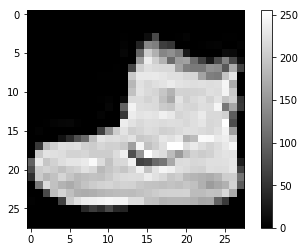

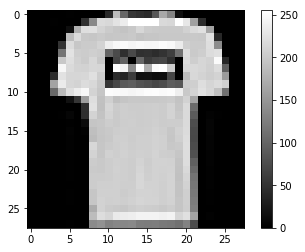

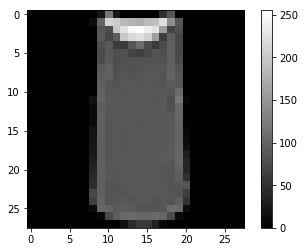

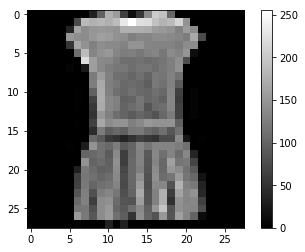

[None, None, None, None]

In [37]:
[show_as_image(i) for i in X_train2[:4]]

Similar to the MNIST handwitten digits data, there are 10 categories for the images. Let's subset to take just the sweaters, which have a target value of 2:

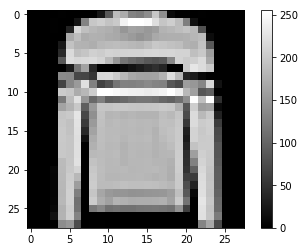

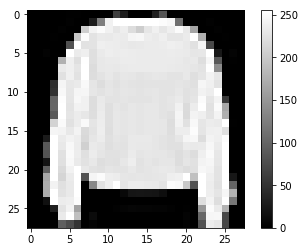

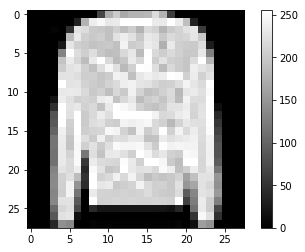

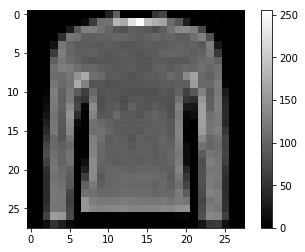

[None, None, None, None]

In [38]:
sweaters = X_train2[y_train2 == 2]
[show_as_image(i) for i in sweaters[:4]]

In [32]:
sweaters.shape

(6000, 28, 28)

We see there are 6000 sweater images in the training set, each with a shape of 28 by 28 pixels. Keep in mind the NMF function needs a flattened array, but our function will do this as well.
<br>
Let's see it in action:

In [40]:
# list of components
list1 = [1, 2, 3, 4, 17, 37, 71]

# shape
shape = (28,28)

Plots for n_components = 1


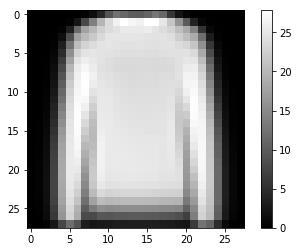



Plots for n_components = 2


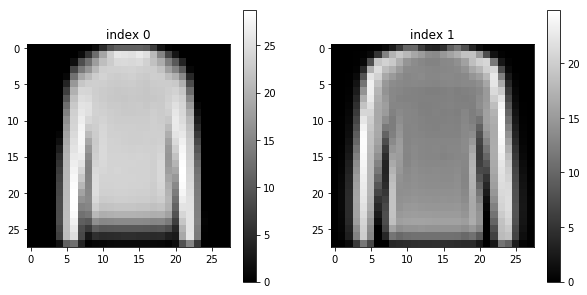



Plots for n_components = 3


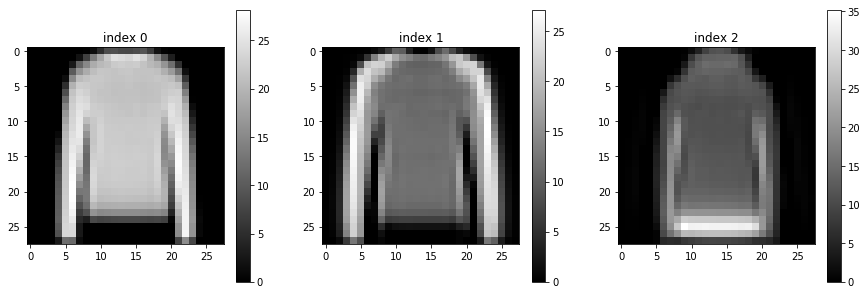



Plots for n_components = 4


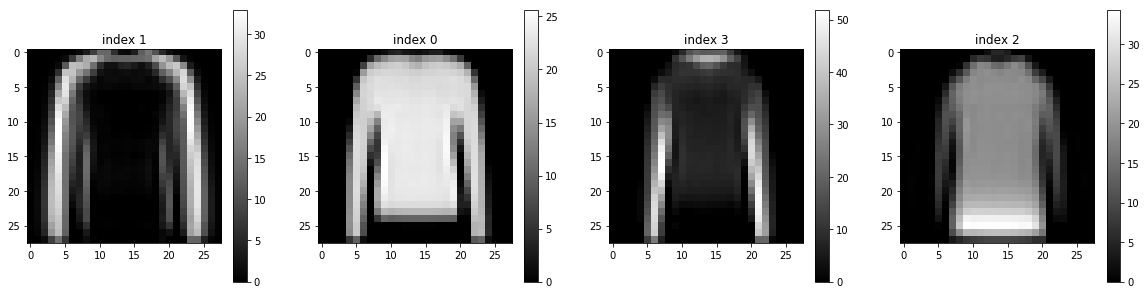



Plots for n_components = 17


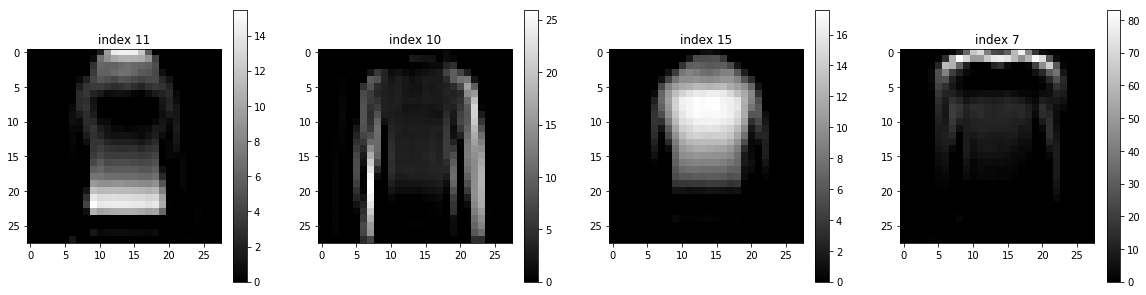



Plots for n_components = 37


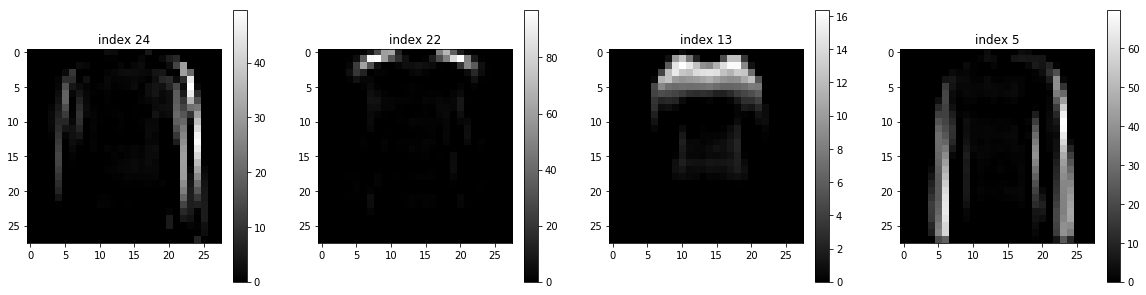



Plots for n_components = 71


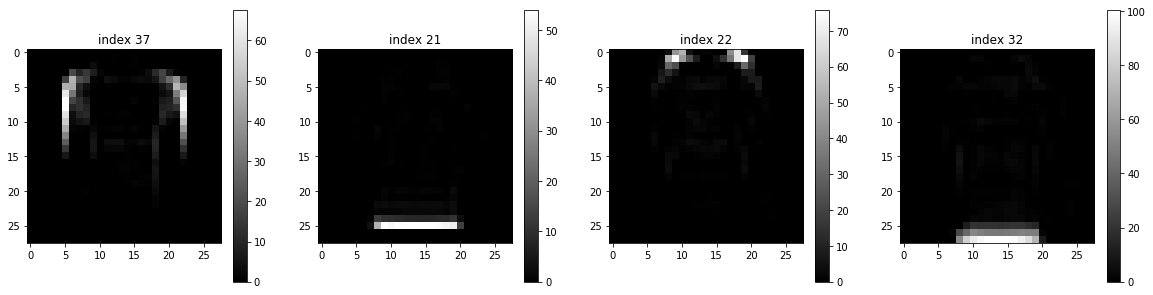

()

In [41]:
# call print_nmf on sweater data
print_nmf(sweaters, shape, list1)